# Zomato Data Analysis

**Project Description** 

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best 

cuisines of every part of the world which lies in their budget. This analysis is also for those who 

want to find the value for money restaurants in various parts of the country for the cuisines. 

Additionally, this analysis caters the needs of people who are striving to get the best cuisine of 

the country and which locality of that country serves that cuisines with maximum number of 

restaurants. 

 

**Data Storage:**

This problem statement contains two datasets- Zomato.csv and country_code.csv. 

Country_code.csv contains two variables: 

· Country code 

· Country name 

 

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each 

restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables: 

• Restaurant Id: Unique id of every restaurant across various cities of the world 

• Restaurant Name: Name of the restaurant 

• Country Code: Country in which restaurant is located 

• City: City in which restaurant is located 

• Address: Address of the restaurant 

• Locality: Location in the city 

• Locality Verbose: Detailed description of the locality 

• Longitude: Longitude coordinate of the restaurant&#39;s location 

• Latitude: Latitude coordinate of the restaurant&#39;s location 

• Cuisines: Cuisines offered by the restaurant 

• Average Cost for two: Cost for two people in different currencies �� 

• Currency: Currency of the country 

• Has Table booking: yes/no 

• Has Online delivery: yes/ no 

• Is delivering: yes/ no 

• Switch to order menu: yes/no 

• Price range: range of price of food 

• Aggregate Rating: Average rating out of 5 

• Rating color: depending upon the average rating color 

• Rating text: text on the basis of rating of rating 

• Votes: Number of ratings casted by people 

 

Problem statement : In this dataset predict 2 things – 

1) Average Cost for two 

2) Price range 

 

 

Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets 

In [155]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [156]:
import pandas as pd

try:
    df = pd.read_csv("F:\\Data Science\\FlipRobo\\phase 3\\zomato.csv", encoding='ISO-8859-1')
except UnicodeDecodeError as e:
    print(f"Error reading file with ISO-8859-1 encoding: {e}")

    try:
        # If ISO-8859-1 doesn't work, try with 'latin1'
        df = pd.read_csv("F:\\Data Science\\FlipRobo\\phase 3\\zomato.csv", encoding='latin1')
    except UnicodeDecodeError as e:
        print(f"Error reading file with latin1 encoding: {e}")

        # If both encodings fail, further investigation might be needed
        print("Failed to read the file with common encodings. Consider inspecting the file for unusual characters.")


In [157]:
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [158]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [159]:
df.shape

(9551, 21)

In [160]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [161]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

## Checking if dataset contains any null

In [162]:
## Checking if dataset contains any null

nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['Cuisines']


* Cuisines seems to contain null values. Hence any further analysis involving Cuisines the NaN values has to be considered.
* There is an other file which is also available along with this dataset

## Exploratory Analysis and Visualization
Before we ask question on the dataset, it would be helpful to understand the restaurants geographical spread, understanding the rating, Currency, Online Delivery, City coverage…etc.
### List of citiesthe survey is spread across

In [163]:
print('List of counteris the survey is spread accross - ')
for x in pd.unique(df.City): print(x)
print()
print('Total number to City', len(pd.unique(df.City)))

List of counteris the survey is spread accross - 
Makati City
Mandaluyong City
Pasay City
Pasig City
Quezon City
San Juan City
Santa Rosa
Tagaytay City
Taguig City
Brasí_lia
Rio de Janeiro
Sí£o Paulo
Albany
Armidale
Athens
Augusta
Balingup
Beechworth
Boise
Cedar Rapids/Iowa City
Chatham-Kent
Clatskanie
Cochrane
Columbus
Consort
Dalton
Davenport
Des Moines
Dicky Beach
Dubuque
East Ballina
Fernley
Flaxton
Forrest
Gainesville
Hepburn Springs
Huskisson
Inverloch
Lakes Entrance
Lakeview
Lincoln
Lorn
Macedon
Macon
Mayfield
Mc Millan
Middleton Beach
Miller
Monroe
Montville
Ojo Caliente
Orlando
Palm Cove
Paynesville
Penola
Pensacola
Phillip Island
Pocatello
Potrero
Princeton
Rest of Hawaii
Savannah
Singapore
Sioux City
Tampa Bay
Tanunda
Trentham East
Valdosta
Vernonia
Victor Harbor
Vineland Station
Waterloo
Weirton
Winchester Bay
Yorkton
Abu Dhabi
Dubai
Sharjah
Agra
Ahmedabad
Allahabad
Amritsar
Aurangabad
Bangalore
Bhopal
Bhubaneshwar
Chandigarh
Chennai
Coimbatore
Dehradun
Faridabad
Ghaziabad


In [201]:
from plotly.offline import init_notebook_mode, plot, iplot

labels = list(df.City.value_counts().index)
values = list(df.City.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Cities",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

### As Zomato is a startup from India hence it makes sense that it has maximum business spread across restaurants in India

## Understanding the Rating aggregate, color and text

In [165]:
df2 = df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df2


,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


The above information helps us to understand the realation between Aggregate rating, color and text. We conclude the following color assigned to the ratings:
* Rating 0 — White — Not rated
* Rating 1.8 to 2.4 — Red — Poor
* Rating 2.5 to 3.4 — Orange — Average
* Rating 3.5 to 3.9 — Yellow — Good
* Rating 4.0 to 4.4 — Green — Very Good
* Rating 4.5 to 4.9 — Dark Green — Excellent

Let us try to understand the spread of rating across restaurants

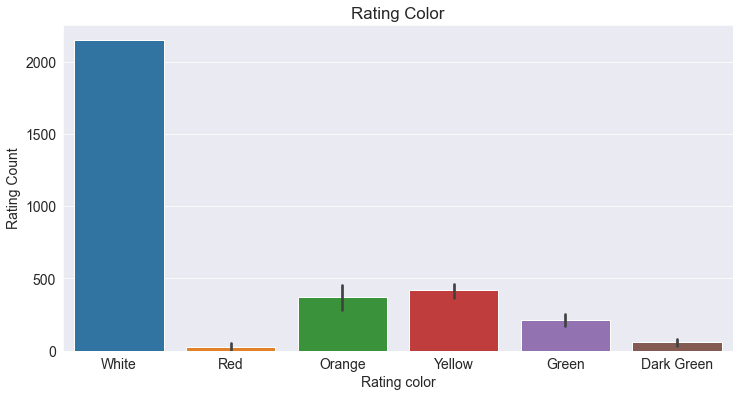

In [166]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
# plt.xticks(rotation=75)
plt.title('Rating Color')
sns.barplot(x=df2['Rating color'], y=df2['Rating Count']);

Interesting, Maximum restaurants seems to have gone No ratings. Let us check if these restaurants belong to some specific country.

Above table display country and the currency they accept. Interestingly four countries seems to be accepting currency in dollars.

## Online delivery distribution

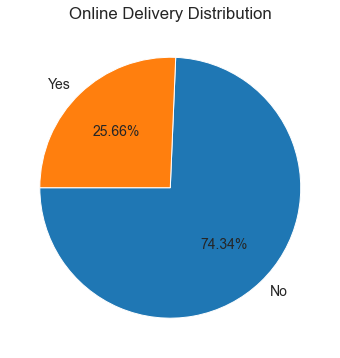

In [167]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df['Has Online delivery'].value_counts()/9551*100, labels=df['Has Online delivery'].value_counts().index, autopct='%1.2f%%', startangle=180);

Only 25.66% of restaurants accepts online delivery. This data might be biased as we have maximum restaurants listed here are from India. Maybe analysis over city wise would be more helpful.

# Distribution of Price Range

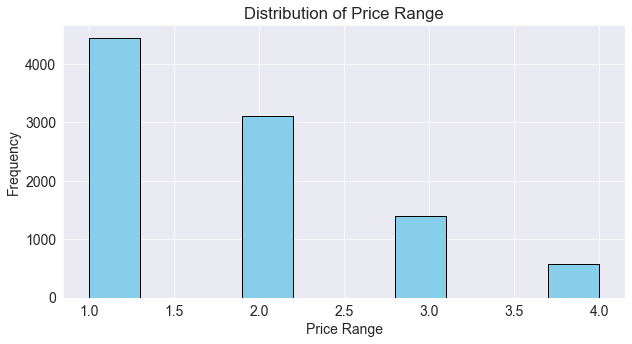

In [168]:
plt.hist(df['Price range'], color='skyblue', edgecolor='black')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Frequency of range 1 is approximately 4800**

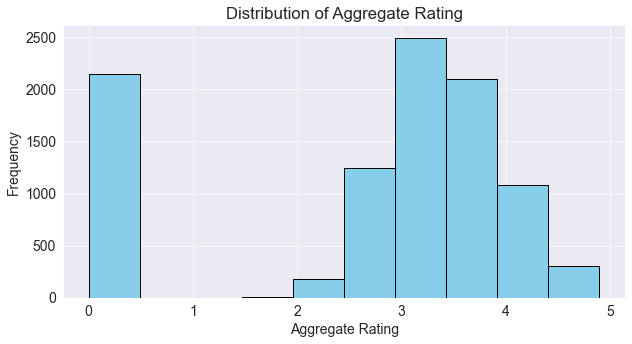

In [169]:
# Distribution of Aggregate Rating
plt.hist(df['Aggregate rating'], color='skyblue', edgecolor='black')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Aggregate rating of 3 is heighest**

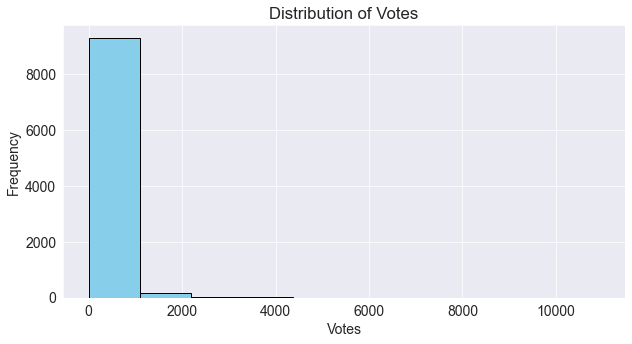

In [137]:
# Distribution of Votes
plt.hist(df['Votes'], color='skyblue', edgecolor='black')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

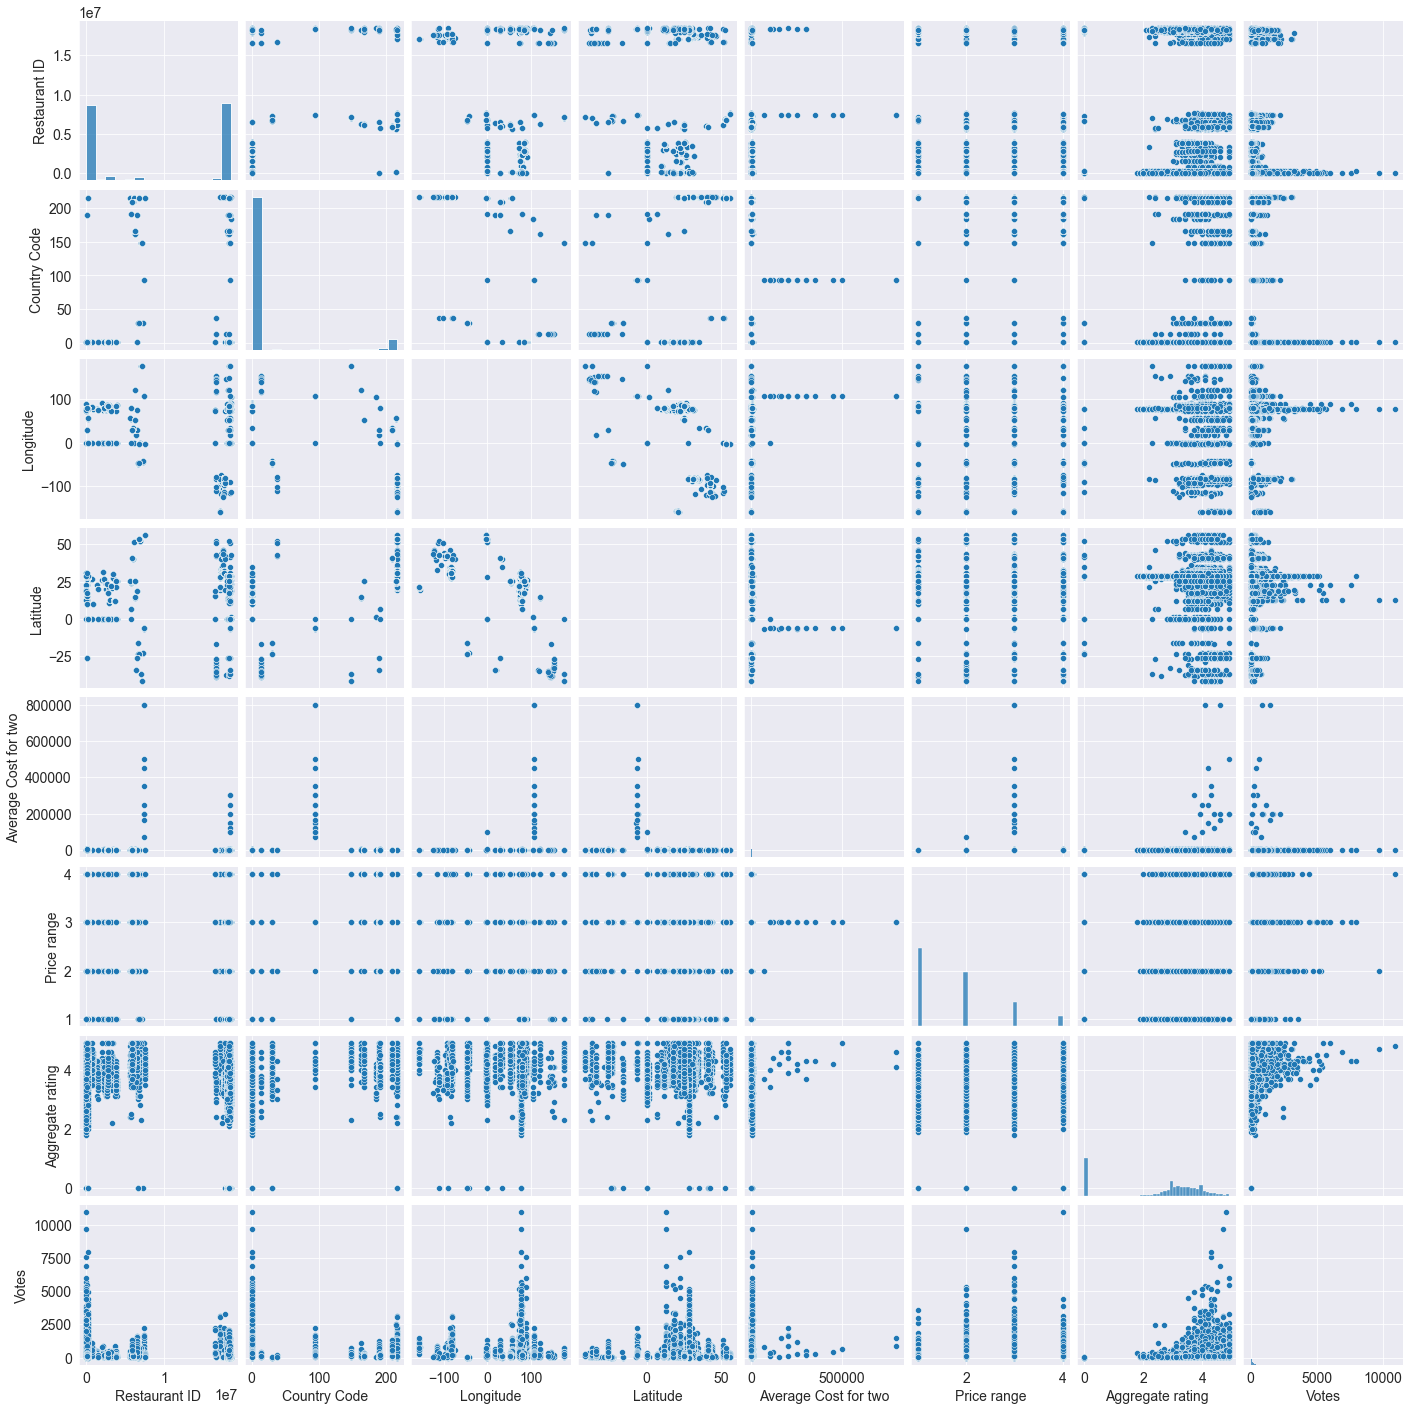

In [138]:
# Pairplot for numerical variables
sns.pairplot(df)
plt.show()

**Categorical Plotting of Count**

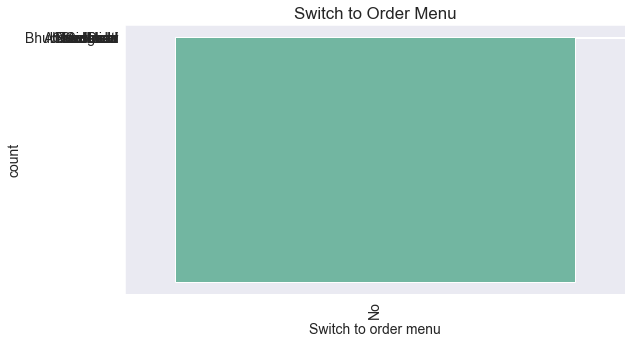

In [139]:
# Count of restaurants with table booking
sns.countplot(data=df, x='Has Table booking', palette='Set2')
plt.title('Has Table Booking')

# Count of restaurants with online delivery
sns.countplot(data=df, x='Has Online delivery', palette='Set2')
plt.title('Has Online Delivery')

# Count of restaurants by rating text
sns.countplot(data=df, x='Rating text', palette='Set2')
plt.xticks(rotation=90)
plt.title('Rating Text')

# Top 10 cities by restaurant count
sns.countplot(data=df, y='City', palette='Set2', order=df['City'].value_counts().index[:10])
plt.title('Top 10 Cities by Restaurant Count')

# Count of restaurants by rating color
sns.countplot(data=df, x='Rating color', palette='Set2')
plt.xticks(rotation=90)
plt.title('Rating Color')

# Count of restaurants by country
sns.countplot(data=df, x='Country Code', palette='Set2')
plt.xticks(rotation=90)
plt.title('Country Code')

# Count of restaurants by currency
sns.countplot(data=df, x='Currency', palette='Set2')
plt.xticks(rotation=90)
plt.title('Currency')

# Count of restaurants delivering now
sns.countplot(data=df, x='Is delivering now', palette='Set2')
plt.xticks(rotation=90)
plt.title('Is Delivering Now')

# Count of restaurants with a switch to order menu
sns.countplot(data=df, x='Switch to order menu', palette='Set2')
plt.xticks(rotation=90)
plt.title('Switch to Order Menu')

plt.tight_layout()
plt.show()

# Heatmaps and Correlation Matrix

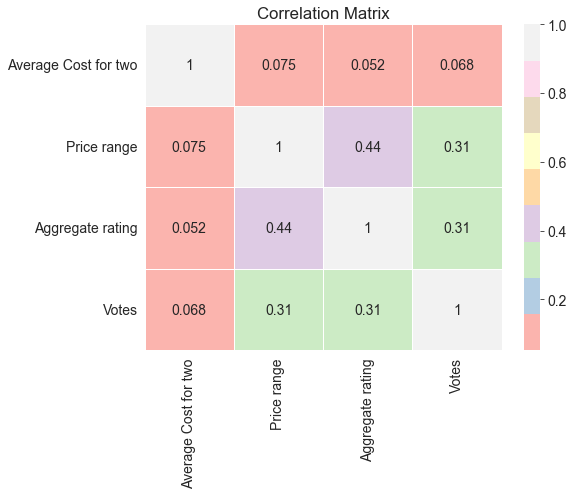

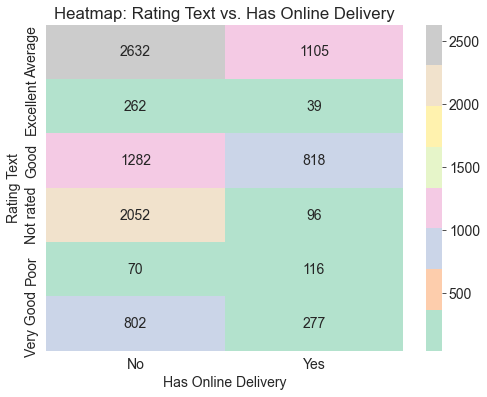

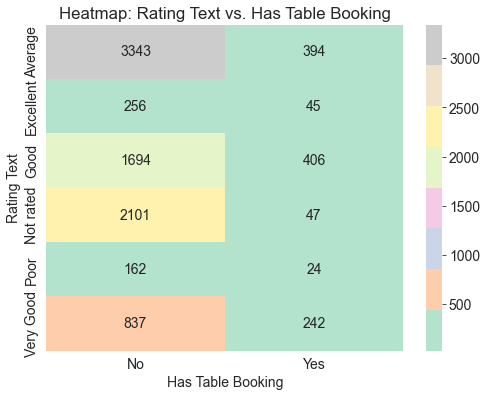

In [140]:
# Correlation matrix
correlation_matrix = df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Heatmap: Rating Text vs. Has Online Delivery
crosstab = pd.crosstab(df['Rating text'], df['Has Online delivery'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Pastel2')
plt.title('Heatmap: Rating Text vs. Has Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Rating Text')
plt.show()

# Heatmap: Rating Text vs. Has Table Booking
crosstab2 = pd.crosstab(df['Rating text'],df['Has Table booking'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab2, annot=True, fmt='d', cmap='Pastel2')
plt.title('Heatmap: Rating Text vs. Has Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Rating Text')
plt.show()

**Price Range and Aggregate Ratings are correlated with votes**

# Boxplot

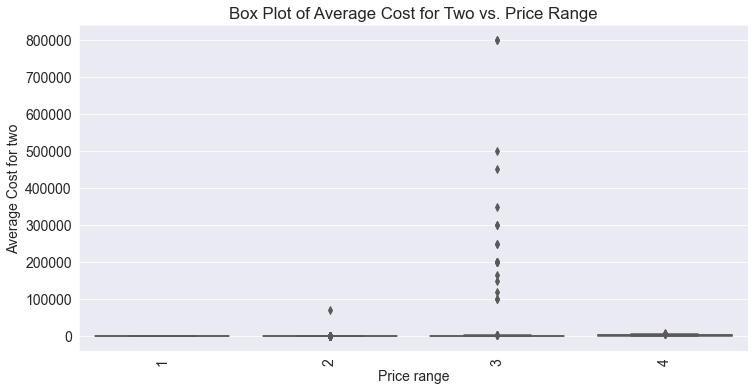

In [141]:
# Box Plot of Average Cost for Two vs. Price Range
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Price range', y='Average Cost for two', palette='Set2')
plt.title('Box Plot of Average Cost for Two vs. Price Range')
plt.xticks(rotation=90)
plt.show()

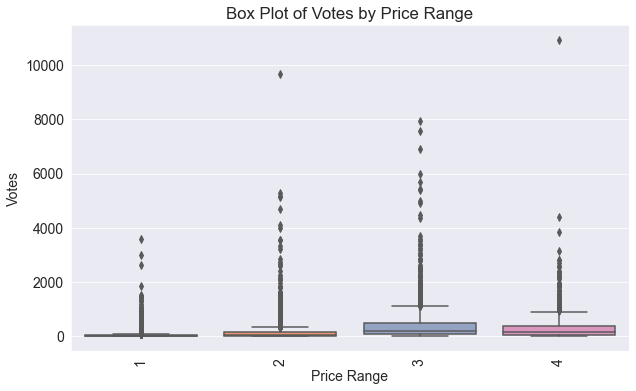

In [142]:
# Box Plot of Votes by Price Range
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Price range', y='Votes', palette='Set2')
plt.title('Box Plot of Votes by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Votes')
plt.xticks(rotation=90)
plt.show()

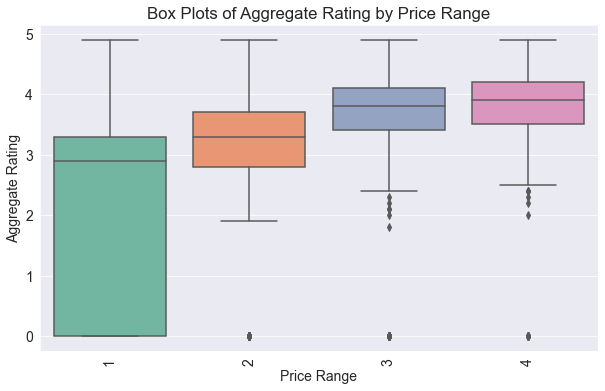

In [143]:
# Box Plots of Aggregate Rating by Price Range
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Price range', y='Aggregate rating', palette='Set2')
plt.title('Box Plots of Aggregate Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

Price range 3 and 4 have more outliers. For Price Range 1 Lower Quartlile is heigher.

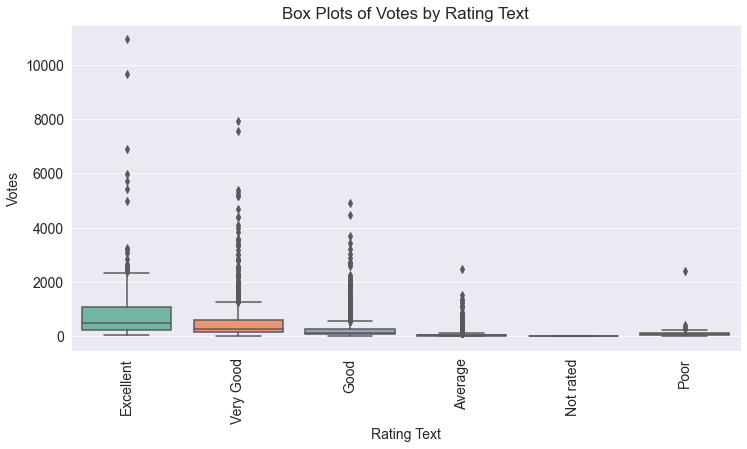

In [144]:
# Box Plots of Votes by Rating Text
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Rating text', y='Votes', palette='Set2')
plt.title('Box Plots of Votes by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Votes')
plt.xticks(rotation=90)
plt.show()

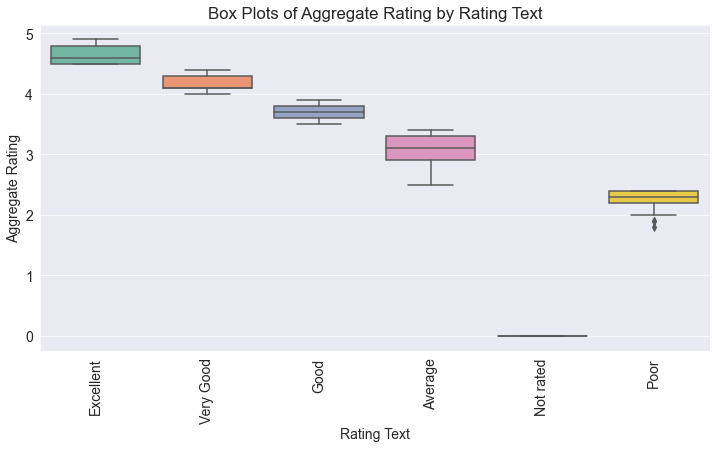

In [145]:
# Box Plots of Aggregate Rating by Rating Text
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Rating text', y='Aggregate rating', palette='Set2')
plt.title('Box Plots of Aggregate Rating by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

# Pie Chart

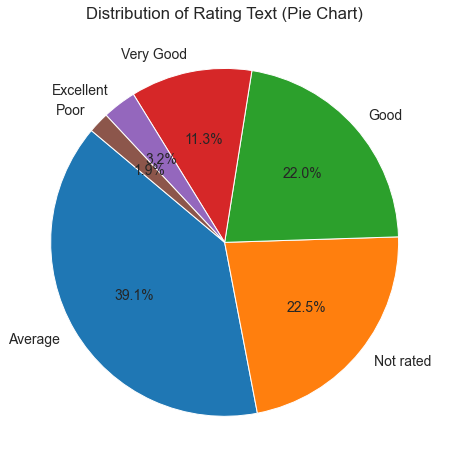

In [146]:
# Distribution of Rating Text (Pie Chart)
rating_counts =df['Rating text'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Rating Text (Pie Chart)')
plt.show()

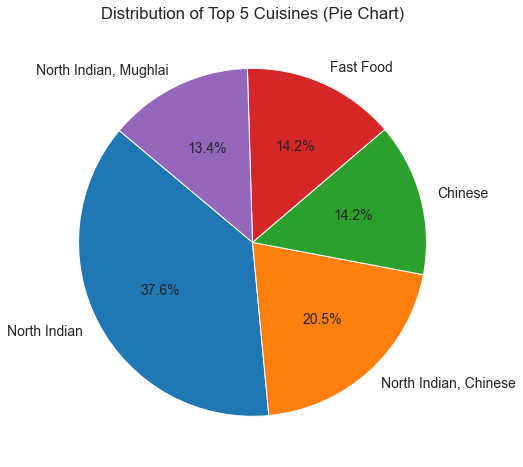

In [147]:
# Distribution of Top 5 Cuisines (Pie Chart)
top_cuisines = df['Cuisines'].value_counts().head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_cuisines, labels=top_cuisines.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 5 Cuisines (Pie Chart)')
plt.show()

# Data Preprocessing

Before building models, we need to preprocess the data, including encoding categorical features and scaling numerical features.

**Encoding the Data**

In [170]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode categorical columns
df['Has Table booking'] = label_encoder.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = label_encoder.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = label_encoder.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = label_encoder.fit_transform(df['Switch to order menu'])
df['Cuisines'] = label_encoder.fit_transform(df['Cuisines'])
df['City'] = label_encoder.fit_transform(df['City'])
df['Rating text'] = label_encoder.fit_transform(df['Rating text'])
df['Rating color'] = label_encoder.fit_transform(df['Rating color'])
df['Locality'] = label_encoder.fit_transform(df['Locality'])
df['Locality Verbose'] = label_encoder.fit_transform(df['Locality Verbose'])
df['Price range'] = label_encoder.fit_transform(df['Price range'])

In [171]:
# Drop unnecessary columns
df = df.drop(['Restaurant Name', 'Address', 'Currency', 'Restaurant ID'], axis=1)

# Model Building, Selection, Evaluation and Hyperparameter Tuning

**Predicting Average Cost for Two**

We'll split the dataset into training and testing data to predict the average cost for two. We'll also scale the data for model building.

In [172]:
from sklearn.model_selection import train_test_split

X_cost = df.drop(['Average Cost for two'], axis=1)
y_cost = df['Average Cost for two']

X_cost_train, X_cost_test, y_cost_train, y_cost_test = train_test_split(X_cost, y_cost, test_size=0.2, random_state=42)

In [173]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_cost_train_scaled = scaler.fit_transform(X_cost_train)
X_cost_test_scaled = scaler.transform(X_cost_test)

**Model Building and Evaluation for Predicting Average Cost for Two**

**Linear Regression**

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_linear = linear_reg_model.predict(X_cost_test_scaled)

mse_linear = mean_squared_error(y_cost_test, y_cost_pred_linear)
mae_linear = mean_absolute_error(y_cost_test, y_cost_pred_linear)
r2_linear = r2_score(y_cost_test, y_cost_pred_linear)

In [175]:
cv_scores_linear = cross_val_score(linear_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_linear = np.sqrt(-cv_scores_linear)

print("Linear Regression Model:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"R-squared (R2) Score: {r2_linear:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_linear):.2f}")

Linear Regression Model:
Mean Squared Error (MSE): 372549196.50
Mean Absolute Error (MAE): 1889.01
R-squared (R2) Score: 0.02
Cross-Validated RMSE: 14426.53


**Ridge Regression**

In [176]:
from sklearn.linear_model import Ridge

ridge_reg_model = Ridge()
ridge_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_ridge = ridge_reg_model.predict(X_cost_test_scaled)

mse_ridge = mean_squared_error(y_cost_test, y_cost_pred_ridge)
mae_ridge = mean_absolute_error(y_cost_test, y_cost_pred_ridge)
r2_ridge = r2_score(y_cost_test, y_cost_pred_ridge)


In [177]:
cv_scores_ridge = cross_val_score(ridge_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_ridge = np.sqrt(-cv_scores_ridge)

print("Ridge Regression Model:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"R-squared (R2) Score: {r2_ridge:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_ridge):.2f}")

Ridge Regression Model:
Mean Squared Error (MSE): 372531332.38
Mean Absolute Error (MAE): 1885.52
R-squared (R2) Score: 0.02
Cross-Validated RMSE: 14425.62


**Random Forest Regressor**

In [178]:
from sklearn.ensemble import RandomForestRegressor

rf_reg_model = RandomForestRegressor()
rf_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_rf = rf_reg_model.predict(X_cost_test_scaled)

mse_rf = mean_squared_error(y_cost_test, y_cost_pred_rf)
mae_rf = mean_absolute_error(y_cost_test, y_cost_pred_rf)
r2_rf = r2_score(y_cost_test, y_cost_pred_rf)

cv_scores_rf = cross_val_score(rf_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_rf = np.sqrt(-cv_scores_rf)

print("Random Forest Regressor Model:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared (R2) Score: {r2_rf:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_rf):.2f}")

Random Forest Regressor Model:
Mean Squared Error (MSE): 188260400.10
Mean Absolute Error (MAE): 572.65
R-squared (R2) Score: 0.51
Cross-Validated RMSE: 8769.31


**Gradient Boosting Regressor**

In [179]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg_model = GradientBoostingRegressor()
gb_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_gb = gb_reg_model.predict(X_cost_test_scaled)

mse_gb = mean_squared_error(y_cost_test, y_cost_pred_gb)
mae_gb = mean_absolute_error(y_cost_test, y_cost_pred_gb)
r2_gb = r2_score(y_cost_test, y_cost_pred_gb)


In [180]:
cv_scores_gb = cross_val_score(gb_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_gb = np.sqrt(-cv_scores_gb)

print("Gradient Boosting Regressor Model:")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"R-squared (R2) Score: {r2_gb:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_gb):.2f}")

Gradient Boosting Regressor Model:
Mean Squared Error (MSE): 202128193.39
Mean Absolute Error (MAE): 554.14
R-squared (R2) Score: 0.47
Cross-Validated RMSE: 11602.44


**Based on the results of evaluation, the Random Forest Regressor model has the best performance in terms of the R-squared (R2) score and Cross-Validated RMSE.**

# Hyperparameter Tuning: Random Forest Regressor

In [181]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
}

rf_reg_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_reg_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_cost_train_scaled, y_cost_train)

best_params = grid_search.best_params_

print("Best Hyperparameters for rf_reg_model:", best_params)



Best Hyperparameters for rf_reg_model: {'max_depth': 3, 'n_estimators': 100}


In [182]:
best_rf_reg_model = grid_search.best_estimator_

y_cost_pred_best_rf = best_rf_reg_model.predict(X_cost_test_scaled)

mse_rf_best = mean_squared_error(y_cost_test, y_cost_pred_best_rf)
mae_rf_best = mean_absolute_error(y_cost_test, y_cost_pred_best_rf)
r2_rf_best = r2_score(y_cost_test, y_cost_pred_best_rf)

print("Best RandomForestRegressor Model:")
print(f"Mean Squared Error (MSE): {mse_rf_best:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf_best:.2f}")
print(f"R-squared (R2) Score: {r2_rf_best:.2f}")

Best RandomForestRegressor Model:
Mean Squared Error (MSE): 163755240.95
Mean Absolute Error (MAE): 614.05
R-squared (R2) Score: 0.57


**After hyperparameter tuning, the Mean Squared Error has reduced, the Mean Absolute Error has slightly increased, and there is an increase in the R2 score. This indicates that the model performance has been slightly improved, and the model is better at handling unseen data.**

**Checking the Model Prediction on Sample Data for Part one**

**Now, we can check the model's prediction on sample data for average cost for two.**


**Sample Data for Prediction - Average cost for two**

In [183]:
sample_data1 = pd.DataFrame({
    'Country Code': [162],
    'City': [23],
    'Locality': [35],
    'Locality Verbose': [89],
    'Longitude': [131.02235],
    'Latitude': [4.565443],
    'Cuisines': [881],
    'Has Table booking': [1],
    'Has Online delivery': [1],
    'Is delivering now': [0],
    'Switch to order menu': [1],
    'Price range': [1],
    'Aggregate rating': [2.8],
    'Rating color': [0],
    'Rating text': [4],
    'Votes': [714]
})

sample_data1_scaled = scaler.transform(sample_data1)

# Predictions
sample_pred1 = best_rf_reg_model.predict(sample_data1_scaled)

print("Predicted Average Cost for Two (Sample Data 1):", sample_pred1[0])

Predicted Average Cost for Two (Sample Data 1): 976.0933397794402


# Part 2

**Predicting Price Range**

In [184]:
#Splitting dataset
X_price_range = df.drop(['Price range'], axis=1)
y_price_range = df['Price range']

X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price_range, y_price_range, test_size=0.2, random_state=42)

In [188]:
# Encode categorical columns
X_price_train_encoded = pd.get_dummies(X_price_train, columns=['Country Code','Rating text', 'Rating color'])

X_price_test_encoded = pd.get_dummies(X_price_test, columns=['Country Code', 'Rating text', 'Rating color'])

# Model Building and Evaluation for Predicting Price Range

**We'll build and evaluate several classification models for predicting the price range, including Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier.**

**Logistic Regression**

In [189]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_price_train_encoded, y_price_train)

y_price_pred_logistic = logistic_reg_model.predict(X_price_test_encoded)

accuracy_logistic = accuracy_score(y_price_test, y_price_pred_logistic)
classification_rep_logistic = classification_report(y_price_test, y_price_pred_logistic)

print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print("Classification Report:\n", classification_rep_logistic)

Logistic Regression Model:
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       907
           1       0.72      0.82      0.77       618
           2       0.51      0.51      0.51       266
           3       0.20      0.01      0.02       120

    accuracy                           0.76      1911
   macro avg       0.57      0.56      0.54      1911
weighted avg       0.73      0.76      0.74      1911



**Random Forest Classifier**

In [190]:
from sklearn.ensemble import RandomForestClassifier

rf_class_model = RandomForestClassifier()
rf_class_model.fit(X_price_train_encoded, y_price_train)

y_price_pred_rf_class = rf_class_model.predict(X_price_test_encoded)

accuracy_rf_class = accuracy_score(y_price_test, y_price_pred_rf_class)
classification_rep_rf_class = classification_report(y_price_test, y_price_pred_rf_class)

print("Random Forest Classifier Model:")
print(f"Accuracy: {accuracy_rf_class:.2f}")
print("Classification Report:\n", classification_rep_rf_class)

Random Forest Classifier Model:
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       907
           1       0.96      0.97      0.96       618
           2       0.86      0.89      0.88       266
           3       0.88      0.76      0.82       120

    accuracy                           0.96      1911
   macro avg       0.92      0.90      0.91      1911
weighted avg       0.96      0.96      0.96      1911



**Gradient Boosting Regressor**

In [191]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg_model = GradientBoostingRegressor()
gb_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_gb = gb_reg_model.predict(X_cost_test_scaled)

mse_gb = mean_squared_error(y_cost_test, y_cost_pred_gb)
mae_gb = mean_absolute_error(y_cost_test, y_cost_pred_gb)
r2_gb = r2_score(y_cost_test, y_cost_pred_gb)

cv_scores_gb = cross_val_score(gb_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_gb = np.sqrt(-cv_scores_gb)

print("Gradient Boosting Regressor Model:")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"R-squared (R2) Score: {r2_gb:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_gb):.2f}")

Gradient Boosting Regressor Model:
Mean Squared Error (MSE): 202108290.98
Mean Absolute Error (MAE): 553.40
R-squared (R2) Score: 0.47
Cross-Validated RMSE: 11480.63


**Based on the results of evaluation, the Random Forest Regressor model has the best performance in terms of the R-squared (R2) score and Cross-Validated RMSE.**